# Add timer to FFA and CSF

In [7]:
from lib import *
import polars as pl

pl.Config.set_tbl_rows(100)
pl.Config.set_tbl_cols(None)

DYNA_HW = "./platforms/exynos5422LITTLE.json"
STAT_HW = "./platforms/exynos5422LITTLEx10.json"

## Impact on power consumption

In [8]:
df_no_delay = process_logs("data_umax0_9", ["no_delay", "no_delay", "no_delay"], DYNA_HW)
df_delay = process_logs("data_umax0_9", ["delay", "delay", "delay"], DYNA_HW)
df_timer = process_logs("data_umax0_9", ["delay", "timer", "timer"], DYNA_HW)

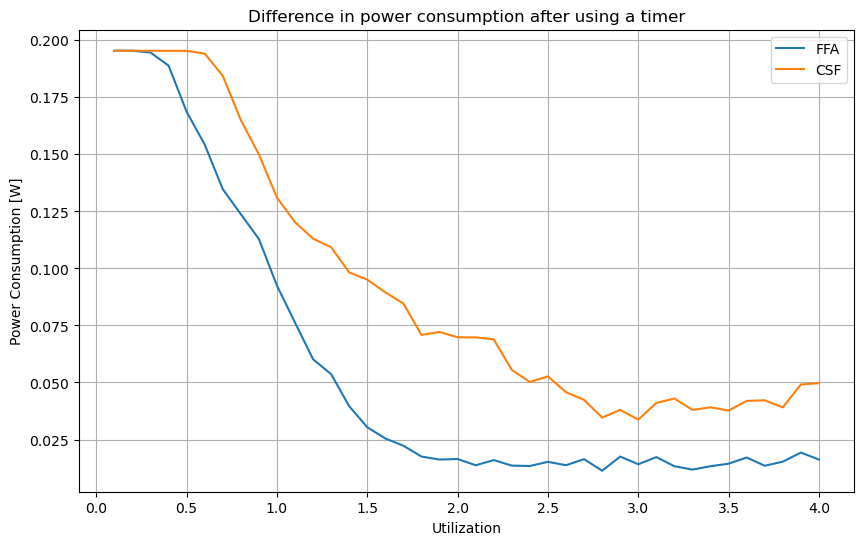

In [9]:
ffa_diff = []
csf_diff = [] 

for idx in range(len(df_timer["util"])):
    ffa_diff.append((df_timer["ffa"][idx]["power"] - df_delay["ffa"][idx]["power"]).mean())

for idx in range(len(df_timer["util"])):
    csf_diff.append((df_timer["csf"][idx]["power"] - df_delay["csf"][idx]["power"]).mean())

df = pl.DataFrame({
    "util": df_timer["util"],
    "ffa": ffa_diff,
    "csf": csf_diff
}).to_pandas()

plt.figure(figsize=(10, 6))
plt.plot(df['util'], df['ffa'], label='FFA')
plt.plot(df['util'], df['csf'], label='CSF')
plt.xlabel('Utilization')
plt.ylabel('Power Consumption [W]')
plt.title('Difference in power consumption after using a timer')
plt.legend()
plt.grid(True)
plt.show()

## Impact sur les deadlines missed

In [25]:
def run_scenario(schedview, platform, path, measures):
    args = [schedview, "--platform", platform, "--directory", path, "--index"]
    args += measures
    output = subprocess.run(
        args,
        capture_output=True,
        text=True,
        check=True,
    )
    return pl.read_csv(StringIO(output.stdout), separator=";")

run_scenario(SCHEDVIEW, DYNA_HW, "./data_umax0_9_logs_pa_delay/util_3_1", ["--deadlines-counts", "--energy"])

deadlines-counts,energy,file
i64,f64,str
0,6285.318192,"""./data_umax0_9_logs_pa_delay/u…"
0,7842.686235,"""./data_umax0_9_logs_pa_delay/u…"
0,11333.791363,"""./data_umax0_9_logs_pa_delay/u…"
0,20826.372758,"""./data_umax0_9_logs_pa_delay/u…"
0,15405.854097,"""./data_umax0_9_logs_pa_delay/u…"
0,21138.10214,"""./data_umax0_9_logs_pa_delay/u…"
7,14198.216904,"""./data_umax0_9_logs_pa_delay/u…"
0,6212.333941,"""./data_umax0_9_logs_pa_delay/u…"
0,15001.2696,"""./data_umax0_9_logs_pa_delay/u…"
